<a href="https://colab.research.google.com/github/Scrabby1/ADA-Informes/blob/main/Informe_Select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Descripción del problema

**Entrada:** conjunto de **n** números diferentes en un arreglo **A** y un índice **k**.

**Salida:** un **x** elemento el cual corresponde al dato buscado,este dato sera el menor k-ésimo elemento del arreglo.

Uno de los usos que podemos darle a los algoritmos es poder seleccionar un dato especifico que queremos utilizar, en este caso como en la estadística queremos seleccionar el menor dato k-ésimo de la colección que tenemos. Este tipo de problema se le conoce como problema de selección, en este informe vamos a demostrar un algoritmo con el propósito de solucionar el problema, siendo este el algoritmo select.

El tamaño de este problema será el tamaño de la entrada en este caso va a ser el tamaño del arreglo

# 2.Select

In [140]:
def InsertionSort(a):
  b = len(a)
  global cont
  for i in range(1,b):
    key = a[i]
    k = i - 1
    while k >= 0 and key < a[k]: #Se realizan comparaciones desde los elementos a la izquierda hasta que un numero menor sea encontrado
      a[k + 1] = a[k]
      k = k - 1
      cont+=1
    a[k + 1] = key #se coloca el valor en la posicion que le corresponde

  return a

In [141]:
def partition(A, inicio, final): 
  i = -1
  j = 0
  pivote = A[final] #el pivote sera el ultimo dato
  global cont
  while(True): #se reorganizan los datos segun el pivote,si son menores se colocan a la izquierda y a la derecha en el otro caso
    if(j == final): break
    if(A[j] > pivote): 
      j += 1
    else:
      aux = A[j]
      A[j] = A[i + 1]
      A[i + 1] = aux
      i += 1
      j += 1
      cont+=1
    cont+=1
  aux = A[final]
  A[final] = A[i + 1]
  A[i + 1] = aux
  q = i + 1
  return q

In [145]:
import math

def pivotSelection(arr, izq, der,verbose=False):
  global cont
  if(verbose==True):
    print("Se entra en la funcion pivotSelection")
    print("------------------------------------------------")
  if (len(arr) <= 5):#Si el arreglo es menor o igual a 5,se retorna la mediana de esta
    cont+=1
    if(verbose==True):
      print("Se debe retornar la mediana del arreglo debido a el arreglo que es muy pequeño:",arr[len(arr)//2])
      print("************************************************") 
    arr = InsertionSort(arr)
    return arr[len(arr)//2]
  
  subArr = math.ceil((der - izq + 1) / 5)#Se divide el arreglo
  if(verbose==True):
    print("Se crean los sub-arreglos")
  indiceMedianas = []
  medianas = []
  
  for k in range(subArr):
    subRangoIzq = izq + 5 * k
    subRangoDer = izq + 4 + 5 * k

    if (subRangoDer > der): 
      subRangoDer = der
    if(verbose==True):
      print("sub-arreglo",k+1)
      print(arr[subRangoIzq:subRangoDer+1])

    arr[subRangoIzq:subRangoDer+1] = InsertionSort(arr[subRangoIzq:subRangoDer+1])#se ordenan los arreglos
    indiceMedianas.append((subRangoDer + subRangoIzq) // 2)
    medianas.append(arr[indiceMedianas[k]])#se obtiene las medianas
  if(verbose==True):
    print("se obtienen las medianas de esos sub-arreglos")
    print(medianas)

  if(verbose==True):
    print("se debe obtener la mediana de nuestro nuevo arreglo con las medianas")
    print("************************************************")

  cont+=1
  medianas = pivotSelection(medianas, 0, len(medianas) - 1,verbose)#se obtiene la mediana de las medianas

  if(isinstance(medianas, int) == False):
    medianaDeMedianas = medianas[subArr//2]
  else:
    return partition(arr, izq, der)#se llama a la funcion partition para ordenar el arreglo segun el pivote de mediana de medianas

  for k in range(subArr):
    if (medianaDeMedianas == arr[indiceMedianas[k]]):
      i = indiceMedianas[k]
      break

  (arr[der], arr[i]) = (arr[i], arr[der])

  return partition(arr, izq, der)

In [146]:
def select(arr,left,right,k,verbose=False):
  if(k>0 and k<=right-left+1):
    if(verbose==True):
      print("Arreglo recibido en la funcion Select:",arr[left:right+1])
    indPiv=pivotSelection(arr,left,right,verbose)#se obtiene el indice del pivote de mediana de medianas
    if(verbose==True):
      print("pivote resultante:",arr[indPiv])
    if(indPiv-left==k-1):#si es igual que el indice k,se retorna el arreglo en ese indice
      if(verbose==True):
        print("Se debe retornar el arreglo,este es:",arr[indPiv])
        print("------------------------------------------------")
      return arr[indPiv]
    
    if(indPiv-left>k-1):#si es menor,se realiza una llamada recursiva al lado izquierda
      if(verbose==True):
         print("El elemento a buscar se encuentra a la izquierda del arreglo, debido a que el elemento es menor que el pivote")
         print("------------------------------------------------")
      return select(arr,left,indPiv-1,k,verbose)
    if(verbose==True):
      print("El elemento a buscar se encuentra a la derecha del arreglo, debido a que el elemento es mayor que el pivote")
      print("------------------------------------------------")
    return select(arr,indPiv+1,right,k-indPiv+left-1,verbose)#en caso contrario se hace al lado derecho


#Ejemplo
arreglo = [1, 10, 4, 9, 2, 3, 15, 8]
print("Arreglo de entrada:",arreglo)
buscar = 3
cont=0
encontrado = select(arreglo, 0, len(arreglo)-1, buscar)
print("buscar el menor elemento:",buscar)
print("------------------------------------------------")
print("El elemento encontrado fue:",encontrado)
print("Cantidad de comparaciones:",cont)

Arreglo de entrada: [1, 10, 4, 9, 2, 3, 15, 8]
buscar el menor elemento: 3
------------------------------------------------
El elemento encontrado fue: 3
Cantidad de comparaciones: 50


##2.1.Descripción del algoritmo

El algoritmo select recibe como entrada un arreglo **A** de tamaño **n** y una posición a buscar el cual es el mínimo del arreglo. El algoritmo select esta compuesto de cuatro funciones estas son:

**PivoteSelection:** esta función recibe como parámetros el arreglo arr y sus índices finales e iniciales **izq** y **der** esta función realiza los siguientes pasos:

1)Dividir el arreglo en sub-arreglos de 5 elementos cada uno, si no se cubren todos los datos se crea un sub-arreglo con los elementos restantes y si el arreglo es de tamaño menor o igual que 5 se retorna automáticamente la mediana de ese arreglo

2)Se buscan las medianas de los sub-arreglos para hacerlo se ordenan con la función insertionSort

3) Se crea un arreglo que contiene las medianas, luego se obtiene la mediana de esas medianas llamando recursivamente a pivotSelection, esta mediana va a ser nuestro pivote, luego usando la función partition se obtiene el índice y esto retornara la función.


**InsertionSort:** Esta función fue vista previamente, cumple el propósito de ordenar el arreglo que recibe como entrada. Para realizar el orden del arreglo esta va realizando comparaciones entre las posiciones de cada arreglo y realiza intercambios hasta que el elemento este bien colocado en el arreglo. Como salida vamos a tener nuestro arreglo ordenado

**Partition:** Otra función vista previamente, esta se encarga de ordenar el arreglo **arr** según el pivote recibido, esta función asegura que los elementos menores queden al lado izquierdo del pivote y los mayores al derecho, esto lo realiza utilizando dos índices para poder recorrer el arreglo y realizar las comparaciones

**Select:** función principal del algoritmo, recibe como parámetros el arreglo **arr**, la menor posición **l**, la mayor **r** y el elemento a buscar **k** esta funciona de manera recursiva, una vez llamada la función pivoteSelection esta va a retornar un índice, este índice se utilizara para ver hacia donde debemos seguir realizando nuestra búsqueda, esto quiere decir que si el elemento que buscamos es menor a la posición del índice resultado quiere decir que debemos realizar la búsqueda por la izquierda y si es mayor por la derecha, de manera recursividad realizaremos la búsqueda por el lado que corresponde hasta encontrar el elemento más pequeño de este arreglo

Como salida vamos a tener el elemento k-ésimo más pequeño del arreglo.

##2.2.Ejemplo

Tomemos el siguiente arreglo:

**A=[1, 61, 51, 63, 24, 93]**

busquemos el 3er elemento más pequeño

Como el tamaño de este arreglo es de 6 vamos a tener dos sub-arreglos los cuales son:

**A1=[1,61,51,63,24]**
y
**A2=[93]**

Se ordenan los arreglos con la función en insertionSort

**A1=[1,24,51,61,63]**
y 
**A2=[93]**

Se obtiene las medianas de ambos sub-arreglos y se crea un sub-arreglo con esas medianas

**M=[51,93]**

Se hace una llamada recursiva de pivoteSelection y se obtiene la mediana del arreglo M

**M=[93]**

con este pivote se llama la función partition para ordenar el arreglo según el pivote

**A=[1,61,51,63,24,93]**

no ocurre un cambio debido a que el pivote es el mayor elemento, podemos notar que el elemento que buscamos es menor al pivote y también que este se encuentra a su izquierda

Llamamos a select con el siguiente arreglo

**B=[1,61,51,63,24]**

Cuando ingresamos a la función pivoteSelection podemos notar que el tamaño del arreglo es 5, por lo que se retorna automáticamente la mediana 

Podemos notar que el índice donde se encuentra esta mediana es el 3 y también podemos notar que es el tercer valor más pequeño de este arreglo, por lo que hemos encontrado el 3er menor elemento siendo este el 51

## 2.3.Ejecución del algoritmo paso a paso (verbose=True)

In [124]:
import random
a= random.sample(range(1,100),6)
b=random.randint(1, 6)
print("se quiere buscar el menor elemento",b)
encontrar=select(a, 0, len(a)-1, b,True)
print("El elemento encontrado fue:",encontrar)

se quiere buscar el menor elemento 6
Arreglo recibido en la funcion Select: [12, 47, 43, 95, 75, 10]
Se entra en la funcion pivotSelection
------------------------------------------------
Se crean los sub-arreglos
sub-arreglo 1
[12, 47, 43, 95, 75]
sub-arreglo 2
[10]
se obtienen las medianas de esos sub-arreglos
[47, 10]
se debe obtener la mediana de nuestro nuevo arreglo con las medianas
************************************************
Se entra en la funcion pivotSelection
------------------------------------------------
Se debe retornar la mediana del arreglo debido a el arreglo que es muy pequeño: 10
************************************************
pivote resultante: 10
El elemento a buscar se encuentra a la derecha del arreglo, debido a que el elemento es mayor que el pivote
------------------------------------------------
Arreglo recibido en la funcion Select: [43, 47, 75, 95, 12]
Se entra en la funcion pivotSelection
------------------------------------------------
Se crean los s

# 3.Correctitud

##3.1.InsertionSort

**Teorema (Correctitud)**

El algoritmo InsertionSort genera un arreglo de [a1,a2,...,an] con los mismos elementos que recibió en la **entrada** pero estos terminan como **salida** ordenados de menor a mayor.

**Prueba del teorema**

Para probar el teorema vamos a comprobar que la propiedad de bucle invariante del InsertionSort se cumple

La propiedad de bucle invariante del algoritmo insertionSort dice lo siguiente:

Cuando empieza una iteración del bucle que abarca al otro bucle (el for en este caso), el subarreglo a[0..i-1] contiene los mismos elementos del arreglo original, pero ordenados de menor a mayor.

**Inicialización**

Al comienzo de la iteracion solo tendremos la primera posición del arreglo, el primer elemento del arreglo siempre esta y al ser solo un elemento este ya esta ordenado

**Mantención**

Nos colocaremos en la i-ésima iteración, asumiremos que todos los elementos previos a la posición i se encuentran ordenados, ósea que el subarreglo a[0...i-1] se encuentra ordenado.


Una vez hagamos la iteración, la posición i se moverá a la ubicación que le corresponde, si analizamos el nuevo subarreglo a[0...i] contiene los elementos del arreglo original y este se encontrara ordenado de menor a mayor

**Correctitud**

Como la propiedad del bucle invariante a resultado ser correcta en el inicio y en la mantención, al finalizar el algoritmo nosotros tendremos un arreglo de **n** elementos ordenado

## 3.2.Partition

**Teorema (correctitud)**

La función Partition recibe un arreglo A[p..r], lo reorganiza y retorna un índice "q" de tal forma que los elementos del arreglo A[p..q-1] son menores o iguales a A[q] y los elementos del arreglo A[q+1..r] son mayores a A[q].

**Prueba del teorema**

A continuación se utilizará la propiedad invariante de bucle de la función partition para probar su teorema de correctitud. Su propiedad invariante de bucle es la siguiente:

"Al comienzo de cada iteración, se cumple que para cualquier índice "k":

Si **p ≤ k ≤ i**, entonces **A[k] ≤ A[r]**

Si **i < k < j**, entonces **A[k] > A[r]**"

**Inicialización**

Antes de la primera iteración, el índice i = -1 y j = 0, por lo que "k" sólo puede ser menor que 0. Esto significa que tanto **A[k] ≤ A[r]** como **A[k] > A[r]** están vacíos (debido a que "k" no es un índice válido para el arreglo). Luego, durante la primera iteración, se comparará el elemento de la posición "j" con el pivote y luego, dependiendo del resultado de la comparación, el elemento de la posición "j" será agregado al conjunto que va desde "p" hasta "i" o al conjunto que va desde "i" hasta "j", dependiendo de si este es menor o mayor que el pivote.

**Mantención**

Después de la n-ésima iteración, el índice "j" será igual a "n - 1" y se cumplirá que **i < j < r**, entonces para el conjunto de los números A[k] con **p ≤ k ≤ i**, este contendrá **(i - p) + 1** elementos **A[k] ≤ A[r]** y para el conjunto **i < k < j** el conjunto contendrá **(j - i) + 1** elementos **A[k] > A[r]**.

Correctitud

Finalmente, al ser correctas tanto la inicialización como la mantención y al reorganizar el arreglo de entrada y retornar el índice "q" que lo divide en un lado con elementos menores a este y otro con elementos mayores a este, se concluye que el teorema de correctitud de la función Partition es correcto.

## 3.3.PivoteSelection

**Teorema (correctitud)**

La función pivoteSelection retorna correctamente el índice del arreglo que este recibe

**Prueba del teorema**

Para probar este teorema se realizara inducción matematica

Durante el caso base **P(1)** pivoteSelection retornara la mediana del arreglo directamente, ya que solo hay un arreglo y una mediana.  

Durante el caso inductivo se debe probar **P(m)** es correcto para m < n

Si el arreglo es mayor a 5, la función pivoteSelection realizara particiones tales que m=n/5 de cada sub-arreglo más un arreglo k que tendrá el resto de elementos, se sabe que k < m y también se sabe que m < n por lo tanto se asume que el pivoteSelection entrega correctamente el índice

Cabe destacar que las funciones insertionSort y partition son llamadas dentro de la función pivoteSelection, ya se ha probado que ambas funciones están correctas, por lo tanto la función pivoteSelection funciona correctamente

## 3.4.Select

**Teorema (correctitud)**

La función select recibe un arreglo, su primer y ultimo índice y un índice k, esta función retorna el elemento mayor que k-1 del arreglo 

**Prueba del teorema**

Para poder probar el teorema se utilizara inducción matematica

Durante el caso base **P(1)** se retornara la posición donde se encuentra el pivote de pivoteSelection esto ocurre debido a que el arreglo ya es muy pequeño

Durante el caso inductivo se debe probar **P(m)** para m < n

Después de haber llamado el pivoteSelection vamos a tener un arreglo ordenado según un pivote y si el pivote no está en el índice que buscamos, entonces se realizara una búsqueda en uno de los lados que corresponde. Nuestro lado de búsqueda será un arreglo m, este arreglo si o si va a ser menor que m debido a que trabajara con una cierta cantidad de datos originales del arreglo y no con todos

Cabe destacar que la función pivoteSelection ya fue probada que era correcta, por lo tanto la función select también es correcta.

#4.Tiempo de ejecución

Analicemos el peor caso

Recordemos que el tamaño n es dividido en n/5 arreglos de cinco elementos cada uno. Si consideramos M como el arreglo de todas las medianas de los sub-arreglos entonces m tiene (n/5)-una mediana por cada uno de los sub-arreglos. Consideremos la mediana de esta lista (la mediana de medianas) p. La mitad de estos elementos en M son menores que p. La mitad de M seria n/10. Por cada uno de estos n/10 elementos se encuentran dos elementos más pequeños que este. Por lo tanto, habrá 3n/10 < p y en el peor caso habrán 7n/10 elementos restantes. El tiempo normal que toma el algoritmo para encontrar las medianas de los arreglos, la partición toma T(n)=T(n/5)+O(n) siendo O(n) el tiempo de la función partition. Ahora si tomamos 

**T(n)=T(n/5)+T(7n/10)+O(n)**

Podemos usar el teorema maestro para demostrar que la recurrencia es igual a O(n) esto ocurre debido a que caemos en el segundo caso.

Cabe destacar que gracias al metodo que usamos para elegir el pivote reduce el tiempo de ejecucion de O(n^2) a O(n) en la mayoria de casos, la unica forma en que el tiempo de ejecucion terminara en O(n^2) es si terminamos con un pivote en una situacion super desfavorable

# 5.Experimentos

A continuación se presentaran los siguientes experimentos realizados

##5.1.Mejor y peor caso de select

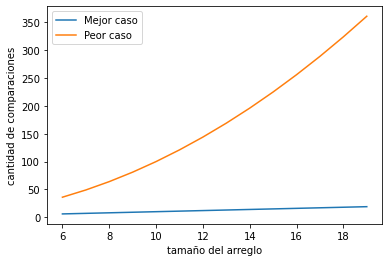

In [144]:
import matplotlib.pyplot as plt
import random

x=[n for n in range(6,20)] #mejor caso
y1=[n*n for n in range(6,20)] #peor caso
y2=[n for n in range(6,20)]
y=[];

for n in range(6,20):
  a= random.sample(range(1,100),n)
  cont=0
  b=select(a, 0, len(a)-1, 1)
  y.append(cont)

plt.plot(x,y2)
plt.plot(x,y1)
plt.legend(["Mejor caso","Peor caso"])

plt.xlabel('tamaño del arreglo')
plt.ylabel('cantidad de comparaciones')
plt.show()

**Análisis de resultados**

Se puede apreciar que en el peor caso hay una gran curva ascendiente, esta curva se debe a la manera en que el pivote termina siendo escogido, terminando en una situacion super desfavorable.Se puede observar que el mejor caso queda muy por debajo del peor caso, esto ocurre ya que en el mejor caso es mas lineal y la cantidad de comparaciones es notablemente menor en todas las funciones que hay.

##5.2.Randomized-select vs select

In [126]:
import random
def randomizedPartition(A,low,high):
  i=random.randint(low,high)

  (A[high],A[i])=(A[i],A[high])
  return partition(A,low,high)

def selectR(arr,left,right,k):
  if(k>0 and k<=right-left+1):
    indPiv=randomizedPartition(arr,left,right)
    if(indPiv-left==k-1):
      return arr[indPiv]
    
    if(indPiv-left>k-1):
      return select(arr,left,indPiv-1,k)
    return select(arr,indPiv+1,right,k-indPiv+left-1)


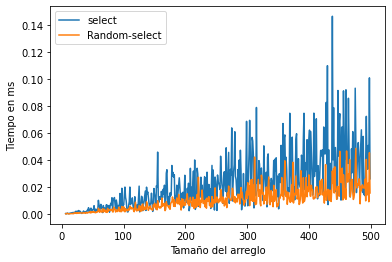

In [139]:
import datetime
from timeit import repeat

x=[];
y=[];
z=[];
for n in range(6,500):
  a = random.sample(range(1,1000),n)
  b = random.sample(range(1,1000),n)
  t = repeat(setup="from __main__ import select", stmt=f"select({a},{0}, {len(a) - 1},{1})", repeat=1, number=10)
  k = repeat(setup="from __main__ import selectR", stmt=f"selectR({a},{0}, {len(a) - 1},{1})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  z.append(k)
plt.plot(x,y)
plt.plot(x,z)

plt.legend(["select","Random-select"])
plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

**Análisis de los resultados**

En primer lugar, se puede apreciar que los dos están muy cerca del otro, casi pegados, esto ocurre ya que los dos hacen de la misma forma la función select, en lo que cambian es la forma en obtener el pivote. Ahora si miramos más en detalle podemos notar que select se encuentra arriba de randomSelect en la mayor parte, esto ocurre ya que la forma de seleccionar el pivote de select es más lenta que random, random escoge aleatoriamente su pivote, pero se puede apreciar que hay veces donde select se encuentra debajo de random, esto ocurre debido a que select tomo un pivote más favorable mientras que random escogió uno menos favorable. También se puede ver que hay varios picos en select, esto ocurre por lo mismo hablado, cuando se elige mal el pivote.